In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading clustered data

In [3]:
clusters_train = pd.read_parquet("temp_data/clustered_data.pq")
clusters_test = pd.read_parquet("temp_data/clustered_test_data.pq")

### Fast check
Let's compare statistics among clusters.<br>
Numbers should be more or less aligned between train and test

In [4]:
clusters_train.groupby(["cluster"]).describe().T

cluster                                    0             1             2  \
enquiry_submit_count     count  95396.000000  36466.000000  13915.000000   
                         mean       0.004235      0.052866      0.036646   
                         std        0.027031      0.218524      0.203437   
                         min        0.000000      0.000000      0.000000   
                         25%        0.000000      0.000000      0.000000   
                         50%        0.000000      0.000000      0.000000   
                         75%        0.000000      0.000000      0.000000   
                         max        0.444444     12.777778      7.000000   
agent_phone_count        count  95396.000000  36466.000000  13915.000000   
                         mean       0.201749      0.579371      0.541716   
                         std        0.483873     15.965372      1.247705   
                         min        0.000000      0.000000      0.000000   
                         25%        0.000000      0.000000      0.000000   
                         50%        0.000000      0.200000      0.250000   
                         75%        0.250000      0.500000      0.577935   
                         max       18.090909   3042.500000     42.333333   
add_to_cart_count        count  95396.000000  36466.000000  13915.000000   
                         mean       0.021199      0.028547      0.563314   
                         std        0.138245      0.160995      1.750980   
                         min        0.000000      0.000000      0.000000   
                         25%        0.000000      0.000000      0.000000   
                         50%        0.000000      0.000000      0.000000   
                         75%        0.000000      0.000000      0.000000   
                         max        3.200000      2.666667     61.000000   
view_item_count          count  95396.000000  36466.000000  13915.000000   
                         mean       1.407183      5.863719     10.340520   
                         std        1.331812      2.852030      7.304902   
                         min        0.000000      0.000000      0.000000   
                         25%        0.200000      4.142857      6.333333   
                         50%        1.090909      5.500000      9.142857   
                         75%        2.300000      7.000000     13.102632   
                         max        7.250000     32.000000    113.500000   
listing_engagement_count count  95396.000000  36466.000000  13915.000000   
                         mean      26.347568     61.668915    206.166649   
                         std       24.518920     40.568594    119.195238   
                         min        0.000000      0.000000      0.000000   
                         25%        7.750000     25.750000    142.750000   
                         50%       19.800000     59.500000    181.500000   
                         75%       37.586714     91.500000    242.500000   
                         max      194.200000    260.333333   2592.000000   
days_active              count  95396.000000  36466.000000  13915.000000   
                         mean       7.688719      5.321478      6.809558   
                         std        5.956272      4.950905      7.449679   
                         min        3.000000      2.000000      2.000000   
                         25%        3.000000      2.000000      2.000000   
                         50%        5.000000      3.000000      4.000000   
                         75%       10.000000      6.000000      8.000000   
                         max       31.000000     58.000000     81.000000   
weekend_ratio            count  95396.000000  36466.000000  13915.000000   
                         mean       0.378529      0.743821      0.759190   
                         std        0.161863      0.335899      0.504142   
                         min        0.033333    

In [5]:
clusters_test.groupby(["cluster"]).describe().T

cluster                                    0            1            2  \
enquiry_submit_count     count  23716.000000  9181.000000  3538.000000   
                         mean       0.004210     0.074563     0.038356   
                         std        0.027098     1.349413     0.235721   
                         min        0.000000     0.000000     0.000000   
                         25%        0.000000     0.000000     0.000000   
                         50%        0.000000     0.000000     0.000000   
                         75%        0.000000     0.000000     0.000000   
                         max        0.400000    90.500000     9.000000   
agent_phone_count        count  23716.000000  9181.000000  3538.000000   
                         mean       0.199876     0.498438     0.547545   
                         std        0.488755     1.049238     1.229430   
                         min        0.000000     0.000000     0.000000   
                         25%        0.000000     0.000000     0.000000   
                         50%        0.000000     0.200000     0.250000   
                         75%        0.250000     0.500000     0.666667   
                         max       21.200000    24.500000    45.000000   
add_to_cart_count        count  23716.000000  9181.000000  3538.000000   
                         mean       0.020876     0.029946     0.562869   
                         std        0.133885     0.168078     1.827843   
                         min        0.000000     0.000000     0.000000   
                         25%        0.000000     0.000000     0.000000   
                         50%        0.000000     0.000000     0.000000   
                         75%        0.000000     0.000000     0.000000   
                         max        2.947368     2.500000    41.454545   
view_item_count          count  23716.000000  9181.000000  3538.000000   
                         mean       1.404265     5.893502    10.448603   
                         std        1.331632     2.823533     7.134431   
                         min        0.000000     0.000000     0.000000   
                         25%        0.200000     4.142857     6.444444   
                         50%        1.093074     5.500000     9.333333   
                         75%        2.333333     7.000000    13.106061   
                         max        7.235294    23.000000    73.000000   
listing_engagement_count count  23716.000000  9181.000000  3538.000000   
                         mean      26.556656    62.167161   205.166152   
                         std       24.950044    40.433552   115.005360   
                         min        0.000000     0.000000     3.500000   
                         25%        7.873641    26.600000   142.942308   
                         50%       19.833333    60.000000   180.500000   
                         75%       37.466667    92.000000   241.000000   
                         max      194.857143   215.000000  1490.166667   
days_active              count  23716.000000  9181.000000  3538.000000   
                         mean       7.728074     5.361616     6.959582   
                         std        5.999857     5.004893     7.756603   
                         min        3.000000     2.000000     2.000000   
                         25%        3.000000     2.000000     2.000000   
                         50%        5.000000     3.000000     4.000000   
                         75%       10.000000     6.000000     8.000000   
                         max       31.000000    40.000000    67.000000   
weekend_ratio            count  23716.000000  9181.000000  3538.000000   
                         mean       0.378125     0.745505     0.764816   
                         std        0.161772     0.339640     0.514195   
                         min        0.034483     0.047619     0.026316   
                         25%        0.250000     0.500000     0.375000   
    

### Compare clusters visually

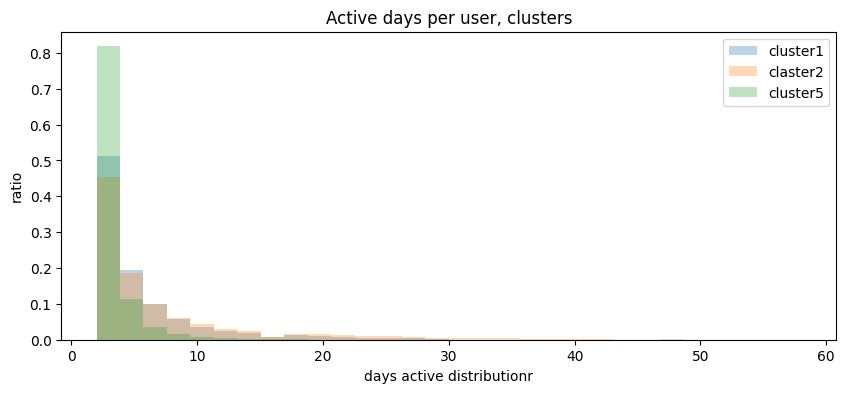

In [15]:
# weights let us see not the numbers, but % of cases with specific value

# EXAMPLE TO COMPARE CLUSTERS
plt.figure(figsize=(10,4))

cluster1 = clusters_train[clusters_train["cluster"] == 1].days_active
cluster2 = clusters_train[clusters_train["cluster"] == 2].days_active
cluster5 = clusters_train[clusters_train["cluster"] == 5].days_active

_, bin, _ = plt.hist(cluster1, bins=30, alpha=0.3,  label="cluster1", weights=np.ones(cluster1.shape[0])/cluster1.shape[0])
plt.hist(cluster2, bins=bin, alpha=0.3, label="claster2", weights=np.ones(cluster2.shape[0])/cluster2.shape[0])
plt.hist(cluster5, bins=bin, alpha=0.3, label="cluster5", weights=np.ones(cluster5.shape[0])/cluster5.shape[0])
plt.xlabel("days active distributionr")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Active days per user, clusters")
plt.legend()
plt.show()

Let's also see if we have similar data for test<br>
We have to pass the same `bins` we used in train plotting to compare it to test<br>
You can also compare train and test at the same plot.

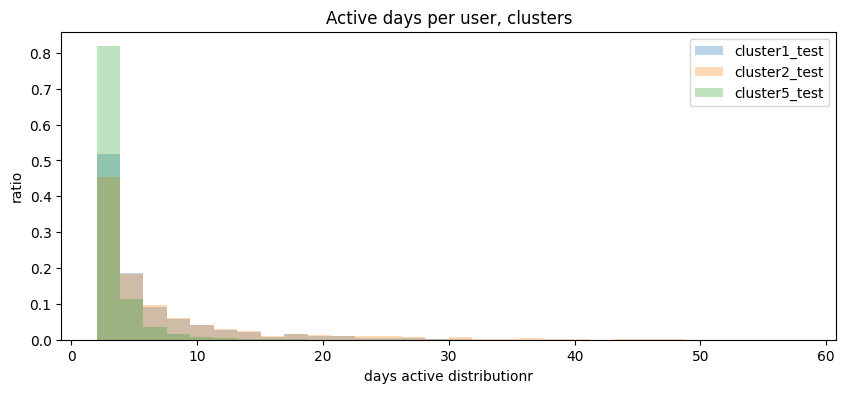

In [17]:
plt.figure(figsize=(10,4))

cluster1_test = clusters_test[clusters_test["cluster"] == 1].days_active
cluster2_test = clusters_test[clusters_test["cluster"] == 2].days_active
cluster5_test = clusters_test[clusters_test["cluster"] == 5].days_active

plt.hist(cluster1_test, bins=bin, alpha=0.3,  label="cluster1_test", weights=np.ones(cluster1_test.shape[0])/cluster1_test.shape[0])
plt.hist(cluster2_test, bins=bin, alpha=0.3, label="cluster2_test", weights=np.ones(cluster2_test.shape[0])/cluster2_test.shape[0])
plt.hist(cluster5_test, bins=bin, alpha=0.3, label="cluster5_test", weights=np.ones(cluster5_test.shape[0])/cluster5_test.shape[0])
plt.xlabel("days active distributionr")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Active days per user, clusters")
plt.legend()
plt.show()

We can see that the cluster5 is less active: they were active less amount of days on average.<br>
At the same time cluster1 and cluster2 are not so dividible in their behavior

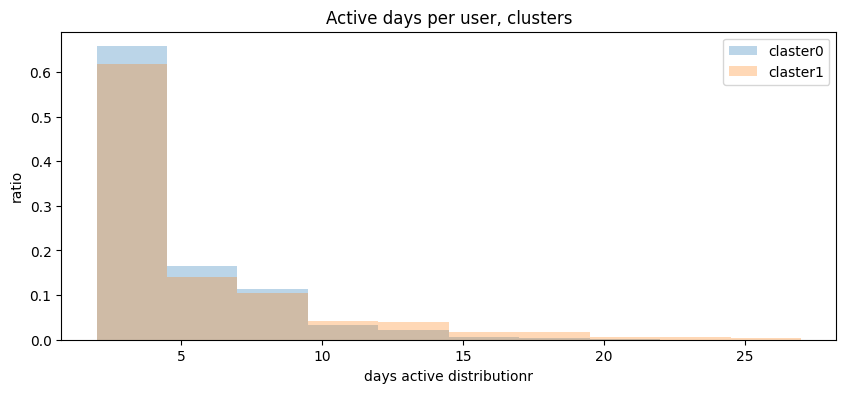

In [14]:
# Let's compare closer cluster0 and cluster1, seem very similar

plt.figure(figsize=(10,4))

_, bin, _ = plt.hist(cluster0, bins=10, alpha=0.3,  label="claster0", weights=np.ones(cluster0.shape[0])/cluster0.shape[0])
plt.hist(cluster1, bins=bin, alpha=0.3, label="claster1", weights=np.ones(cluster1.shape[0])/cluster1.shape[0])

plt.xlabel("days active distributionr")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Active days per user, clusters")
plt.legend()
plt.show()

### Statistical difference
To determine if there is a `real` difference, we have to run tests.<br>

Let's compare if the difference between clusters is statistically significant.<br>
To do so we need to take a test, according to the distribution shape.<br>
In most of the cases we won't have normally distributed variables, so we can use Kolmogorov-Smirnov statistics to compare the distributions

#### Kolmogorov-Smirnov
Let's use statistics to compare clusters

First, let's compare cluster0 and cluster2, we can see they are different at the plot.<br>
Let's make sure.

In [17]:
from scipy import stats

# Assuming 'sample1' and 'sample2' are your two independent sample arrays
# if you have weights, you need to use weighted KS

ks_stat, p_value = stats.ks_2samp(cluster0, cluster2)
if p_value < 0.05:
    print(f"KS score is {round(ks_stat, 2)}, the difference is significant with p-value being {round(p_value, 4)}")
if p_value > 0.05:
    print("Difference is not significant, behavior is the same")

KS score is 0.47, the difference is significant with p-value being 0.0


As we have expected, there is difference between cluster 0 and 2.<br>
The difference was really visible on histogram.<br>
<br>
Cluster 0 and 1 seem to be pretty similar.<br>
Let's check it

In [18]:
ks_stat, p_value = stats.ks_2samp(cluster0, cluster1)
if p_value < 0.05:
    print(f"KS score is {round(ks_stat, 2)}, the difference is significant with p-value being {round(p_value, 4)}")
if p_value > 0.05:
    print("Difference is not significant, behavior is the same")

KS score is 0.07, the difference is significant with p-value being 0.0


The difference is still significant!<br>
Let's make a function to compare clusters with one line of code

In [20]:
def k_s_disc(sample1, sample2):
    ks_stat, p_value = stats.ks_2samp(sample1, sample2)
    if p_value < 0.05:
        print(f"KS score is {round(ks_stat, 2)}, the difference is significant with p-value being {round(p_value, 4)}")
    if p_value > 0.05:
        print("Difference is not significant, behavior is the same")
    
    return ks_stat, p_value

Now we can use it all the same with a print for significance.<br>
Let's explore another variable to test it.

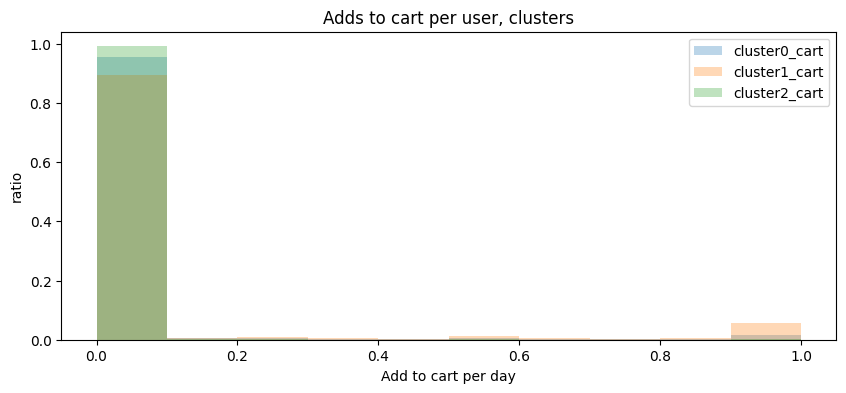

In [23]:
# weights let us see not the numbers, but % of cases with specific value

# EXAMPLE TO COMPARE CLUSTERS
plt.figure(figsize=(10,4))

cluster0_cart = prep_clusters[prep_clusters["cluster"] == 0].add_to_cart_count
cluster1_cart = prep_clusters[prep_clusters["cluster"] == 1].add_to_cart_count
cluster2_cart = prep_clusters[prep_clusters["cluster"] == 2].add_to_cart_count
_, bin, _ = plt.hist(cluster0_cart.clip(upper=1), bins=10, alpha=0.3,
                     label="cluster0_cart", weights=np.ones(cluster0_cart.shape[0])/cluster0_cart.shape[0])
plt.hist(cluster1_cart.clip(upper=1), bins=bin, alpha=0.3, label="cluster1_cart",
         weights=np.ones(cluster1_cart.shape[0])/cluster1_cart.shape[0])
plt.hist(cluster2_cart.clip(upper=1), bins=bin, alpha=0.3, label="cluster2_cart",
         weights=np.ones(cluster2_cart.shape[0])/cluster2_cart.shape[0])
plt.xlabel("Add to cart per day")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Adds to cart per user, clusters")
plt.legend()
plt.show()

In [24]:
# aaand let's run our function
ks_stat, p_value = k_s_disc(cluster0_cart, cluster2_cart)

KS score is 0.04, the difference is significant with p-value being 0.0


In [25]:
# aaand let's run our function
ks_stat, p_value = k_s_disc(cluster1_cart, cluster2_cart)

KS score is 0.1, the difference is significant with p-value being 0.0


In [26]:
# aaand let's run our function
ks_stat, p_value = k_s_disc(cluster0_cart, cluster1_cart)

KS score is 0.06, the difference is significant with p-value being 0.0


#### Interpretation
All of the differences are good, but how would be describe the clusters?<br>
Let's run some statistics to see

In [35]:
def simple_statistics(array):
    print(f"Mean is {round(array.mean(), 4)}")
    print(f"Mode is {array.mode()[0]}")
    print(f"Max is {array.max()}")
    print(f"Min is {array.min()}")

In [36]:
simple_statistics(cluster0_cart)

Mean is 0.034
Mode is 0.0
Max is 2.5
Min is 0.0


In [37]:
simple_statistics(cluster1_cart)

Mean is 0.1098
Mode is 0.0
Max is 2.6666666666666665
Min is 0.0


In [38]:
simple_statistics(cluster2_cart)

Mean is 0.0054
Mode is 0.0
Max is 2.5
Min is 0.0


#### What it tells us?
We can see by the mean, that cluster 1 is more likely to buy.<br>
It is a bit more difficult to conclude, so let's compare % of add_to_cart with not zero value

In [42]:
def count_add_to_cart(array):
    non_zero = np.count_nonzero(array)/len(array)*100
    print(f"{round(non_zero, 2)}% of users in cluster added to cart")

In [43]:
count_add_to_cart(cluster1_cart)

10.67% of users in cluster added to cart


In [44]:
count_add_to_cart(cluster0_cart)

4.57% of users in cluster added to cart


In [45]:
count_add_to_cart(cluster2_cart)

0.9% of users in cluster added to cart


So it looks like `cluster 2` is not really active and not buying much.<br>
`cluster 1` on the other hand is pretty active and 10.67% of the users there are buying.<br>
Let's see the mean amount of days active for the clusters

In [46]:
simple_statistics(cluster0)

Mean is 4.3065
Mode is 2
Max is 27
Min is 2


In [47]:
simple_statistics(cluster1)

Mean is 5.2987
Mode is 2
Max is 64
Min is 2


In [48]:
simple_statistics(cluster2)

Mean is 2.6489
Mode is 2
Max is 27
Min is 2
